In [542]:
import tensorflow as tf 
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [543]:
img_array = cv2.imread("dataset/mask/00200_Mask.jpg")

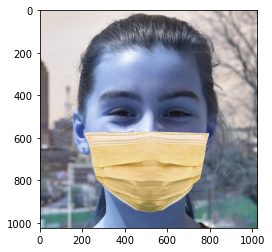

In [544]:
plt.imshow(img_array)

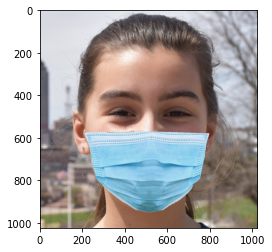

In [545]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [546]:
img_array.shape

(1024, 1024, 3)

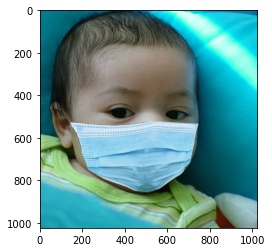

In [547]:
Datadirectory = "dataset"
Classes = ["mask", "no_mask"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

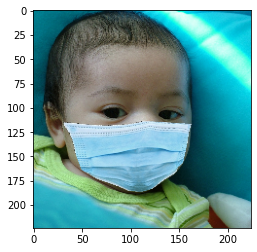

In [548]:
img_size = 224

new_array = cv2.resize(image_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show

In [549]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(image_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [550]:
create_training_data()

In [551]:
print(len(training_data))

400


In [552]:
import random

random.shuffle(training_data)

In [553]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [554]:
X.shape

(400, 224, 224, 3)

In [555]:
X = X/255.0 #normalize data

In [556]:
Y = np.array(y)

In [557]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Deep Learning Model For Training

In [558]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model

In [559]:
model = tf.keras.applications.mobilenet.MobileNet()

In [560]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# Transfer Learning

In [561]:
base_input = model.layers[0].input

In [562]:
base_output = model.layers[-4].output

In [563]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [564]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [565]:
new_model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0  

# Binary Classification (Mask or No mask)

In [566]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", 
                 metrics = ["accuracy"])

In [567]:
new_model.fit(X, Y, batch_size = 1, epochs = 1,
             validation_split = 0.1)

360/360 [==============================] - 142s 357ms/step - loss: 0.1076 - accuracy: 0.9472 - val_loss: 0.0097 - val_accuracy: 1.0000


In [568]:
new_model.save('new_model.h5')

In [569]:
new_model = tf.keras.models.load_model('new_model1.h5')

In [570]:
new_model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0  

# Checking network for prediction

In [571]:
frame = cv2.imread("dataset/mask/00119_Mask.jpg")

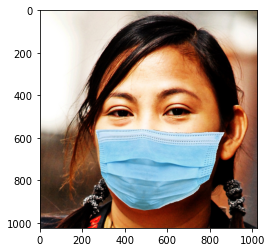

In [572]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [573]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [575]:
Predictions = new_model.predict(final_image)

In [576]:
Predictions

array([[0.00095886]], dtype=float32)

In [577]:
frame = cv2.imread("test.jpg")

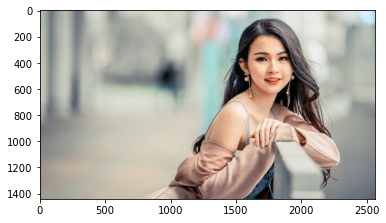

In [578]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [579]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 
                                    'haarcascade_frontalface_default.xml')

In [580]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [581]:
gray.shape

(1440, 2560)

In [582]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex +ew]

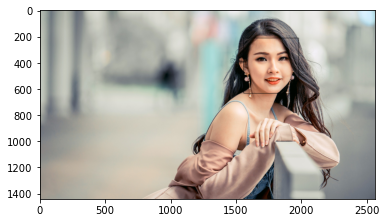

In [583]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

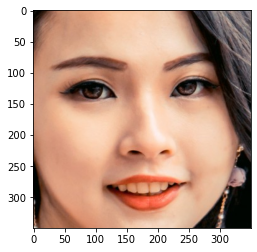

In [584]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [585]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis =0)
final_image = final_image/255.0

In [586]:
Predictions = new_model.predict(final_image)

In [587]:
Predictions

array([[0.9463649]], dtype=float32)

In [641]:
import cv2

path = "haarcascade_frontal_face_default.xml"

video_capture = cv2.VideoCapture(0)
 #check the webcam is opened correctly
if not video_capture.isOpened():
        video_capture = cv2.VideoCapture(0)
if not video_capture.isOpened():
    raise IOError("cannot open webcam")
    
while True:
    ret, frame = video_capture.read()
    frame = cv2.resize(frame, None, fx=0.75, fy=0.75, interpolation = cv2.INTER_AREA)

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex +ew]
            
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis =0)
    final_image = final_image/255.0
    
    
    font_scale = 1
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (Predictions < 0):
        status = "Denied"
        
        #ADD TEXT
        cv2.putText(frame, status, (50, 50), font, 2, (255, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 0))
    
    else:
        status = "Face Detected"
        
        #ADD TEXT
        cv2.putText(frame, status, (100, 100), font, 2, (255, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, ))
        
        cv2.imshow('FACE DETECTION', frame)
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
            
video_capture.release()
cv2.destroyAllWindows()

OSError: cannot open webcam

# Test with webcam

In [643]:
import tensorflow as tf

# Create a model using high-level tf.keras.* APIs
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer='Adam', loss='mean_squared_error') # compile the model
model.fit(x=[-1, 0, 1], y=[-3, -1, 1], epochs=5) # train the model
# (to generate a SavedModel) tf.saved_model.save(model, "saved_model_keras_dir")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Epoch 1/5
1/1 [==============================] - 0s 332ms/step - loss: 3.1107
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 3.0872
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 3.0639
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 3.0406
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 3.0174
INFO:tensorflow:Assets written to: C:\Users\ICH\AppData\Local\Temp\tmpcab34xi_\assets


INFO:tensorflow:Assets written to: C:\Users\ICH\AppData\Local\Temp\tmpcab34xi_\assets
